# Vehicle MPG prediction

### Import of relevant modules and libraries

In this section, we use a range of libraries and the various classes provided by them. The main modules we will use in this analysis are:
* `pandas` for data manipulation
* `numpy` for mathematical operations
* `matplotlib` and `seaborn` for data visualization figures
* `sklearn` for the data preprocessing, cross validation, hyperparameter tuning and the machine learning techniques:
    * `sklearn.ensemble` for the random forest and gradient boosting models
    * `sklearn.linear` for the various linear models - including the regularization models
    * `sklearn.neighbors` for the kNN regression models
* `keras` for access to neural network models and layers

In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from keras.models import Sequential
from keras.layers import Dense

### Import of initial inspection of the dataset

In [356]:
df = pd.read_csv(r"C:\Users\pjhop\OneDrive\Documents\Programming & Coding\Python\Projects\Datasets\auto-mpg.csv")

In [357]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


When looking at the data, we can see how the data has no missing values and how the different datatypes are stored. There is one issue when looking at the datatypes, we can see how the horsepower column is stored as an 'object' when we were expecting an integer or float datatype. We will now look at the values and inspect them to see why.

In [359]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

We can see why the horsepower column has been stored as an object datatype due to the '?' values. To fix this issue we will replace these values with a missing value for our dataset, convert it to a numeric value and then replace it the mean value.

In [360]:
# Replaces the missing values
df['horsepower'] = df['horsepower'].replace({'?':np.nan})

# Convert to int
df['horsepower'] = pd.to_numeric(df['horsepower'])

# Mean horsepower
mean = df['horsepower'].mean()

# Replaces NaN values with mean
df['horsepower'] = df['horsepower'].fillna(mean)

Another issue we face is that we need to one hot encode the categorical variables (model year, origin and number of cylinders). We need to first convert the data into the `object` dtype and then we can use the `pd.get_dummies` function to generate dummies for these variables.

In [361]:
df['cylinders'] = df['cylinders'].astype('object')
df['model year'] = df['model year'].astype('object')
df['origin'] = df['origin'].astype('object')

In [362]:
encoded_df = pd.get_dummies(df[['cylinders', 'model year', 'origin']], drop_first=True)

C:\Users\pjhop\AppData\Local\Temp\ipykernel_29520\2167266958.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  encoded_df = pd.get_dummies(df[['cylinders', 'model year', 'origin']], drop_first=True)
C:\Users\pjhop\AppData\Local\Temp\ipykernel_29520\2167266958.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  encoded_df = pd.get_dummies(df[['cylinders', 'model year', 'origin']], drop_first=True)
C:\Users\pjhop\AppData\Local\Temp\ipykernel_29520\2167266958.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  encoded_df = pd.get_dummies(df[['cylinders', 'model year', 'origin']], drop_first=True)


In [363]:
encoded_df.head()

,cylinders_4,cylinders_5,cylinders_6,cylinders_8,model year_71,model year_72,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82,origin_2,origin_3
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [364]:
final_df = pd.concat([df, encoded_df], axis=1)
pd.set_option("display.max_columns", None)

In [365]:
final_df = final_df.drop(["cylinders", "model year", "origin", "car name"], axis=1)

In [366]:
final_df.head()

,mpg,displacement,horsepower,weight,acceleration,cylinders_4,cylinders_5,cylinders_6,cylinders_8,model year_71,model year_72,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82,origin_2,origin_3
0,18.0,307.0,130.0,3504,12.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,350.0,165.0,3693,11.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,318.0,150.0,3436,11.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16.0,304.0,150.0,3433,12.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,302.0,140.0,3449,10.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis

### For Categorical Variables:

### Bar Chart

In [367]:
cylinder_freq_count = df["cylinders"].value_counts()
origin_freq_count = df["origin"].value_counts()

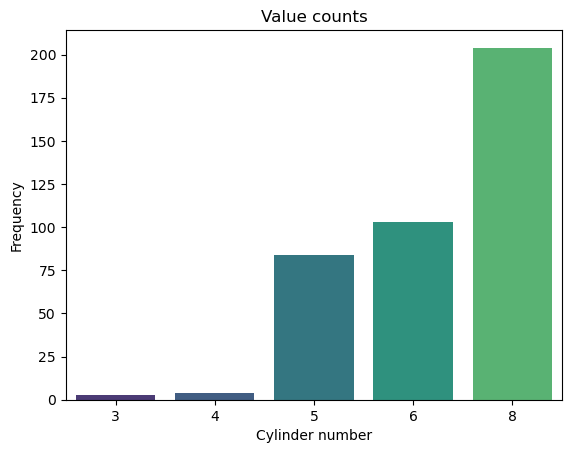

In [368]:
# Bar Chart
ax = sns.barplot(x=cylinder_freq_count.index, y=cylinder_freq_count.values, data=cylinder_freq_count)

# Change the x value labels
ax.set_xticklabels(["3", "4", "5", "6", "8"])

# Title and labels
plt.title("Value counts")
plt.xlabel("Cylinder number")
plt.ylabel("Frequency")

# Display
plt.show()

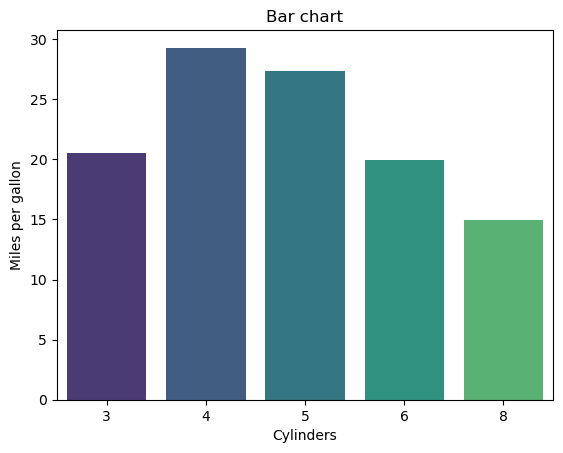

In [369]:
# Bar chart
sns.barplot(x="cylinders", y="mpg", data=df, errorbar=None)

# Title and labels
plt.title("Bar chart")
plt.ylabel("Miles per gallon")
plt.xlabel("Cylinders")

# Display
plt.show()

When looking at these bar charts for cylinders, there are few notable features. There are only a few datapoints that have a small number of cylinders (3-4). When looking at the confidence intervals, we can see how there is a greater spread in mpg performance for those cars with 5 cylinders compared to the any other category.

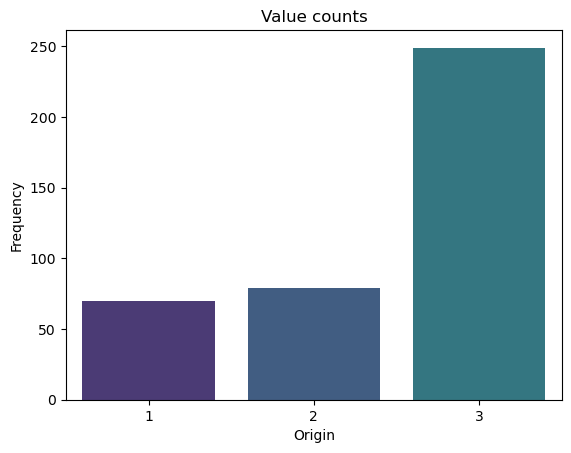

In [370]:
# Bar Chart
ax = sns.barplot(x=origin_freq_count.index, y=origin_freq_count.values, data=origin_freq_count)

# Change the x value labels
ax.set_xticklabels(["1", "2", "3"])

# Title and labels
plt.title("Value counts")
plt.xlabel("Origin")
plt.ylabel("Frequency")

# Display
plt.show()

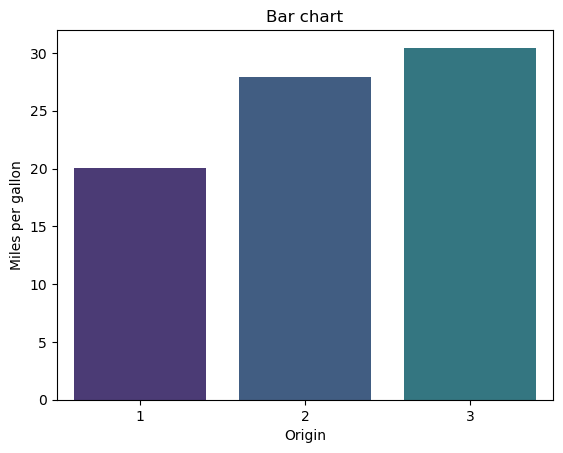

In [371]:
# Bar chart
sns.barplot(x="origin", y="mpg", data=df, errorbar=None)

# Title and labels
plt.title("Bar chart")
plt.ylabel("Miles per gallon")
plt.xlabel("Origin")

# Display
plt.show()

### Boxplots

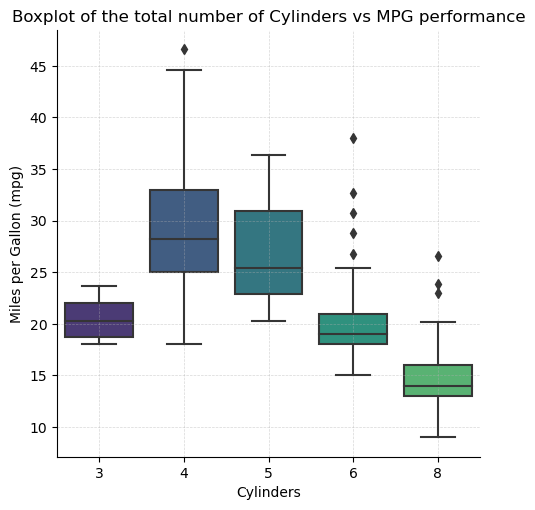

In [372]:
# Set Color Palette
sns.set_palette("viridis")

# Seaborn plot
sns.catplot(x='cylinders', y='mpg', data=df, kind='box')

# Labels
plt.title("Boxplot of the total number of Cylinders vs MPG performance")
plt.xlabel("Cylinders")
plt.ylabel("Miles per Gallon (mpg)")

# Grid
plt.grid(linestyle="--", linewidth=0.5, alpha=0.5)

When looking at the boxplots, we can see that mpg performance peaks at 4 cylinders and then once again slowly decreases up to 8 cylinders. 

In terms of the spread of the performance that is once again similar to total mpg performance with a lower variation at 3 cylinders and large total variance at 4 cylinders after which it gradually begins to shrink. 

In terms of the outliers, there are a greater number of outliers when the number of cylinders are greater, this may be down to a smaller total sample size of these specific vehicles.

### For Numerical Variables:

### Scatterplot

In this section, we use scatterplots to visualize the relationship between the numeical predictor variables and the target variable. In our graphs, we use a LOWESS (Locally Weighted Scatterplot Smoothing) curve to visualize the relationship, it works by breaking the data into segments and then takes uses a weighted regresssion to plot the curve. This curve gives a more accurate representation of the data, and is particularly useful at reducing the noise from outliers.

Text(0.5, 0.98, 'Scatterplot')

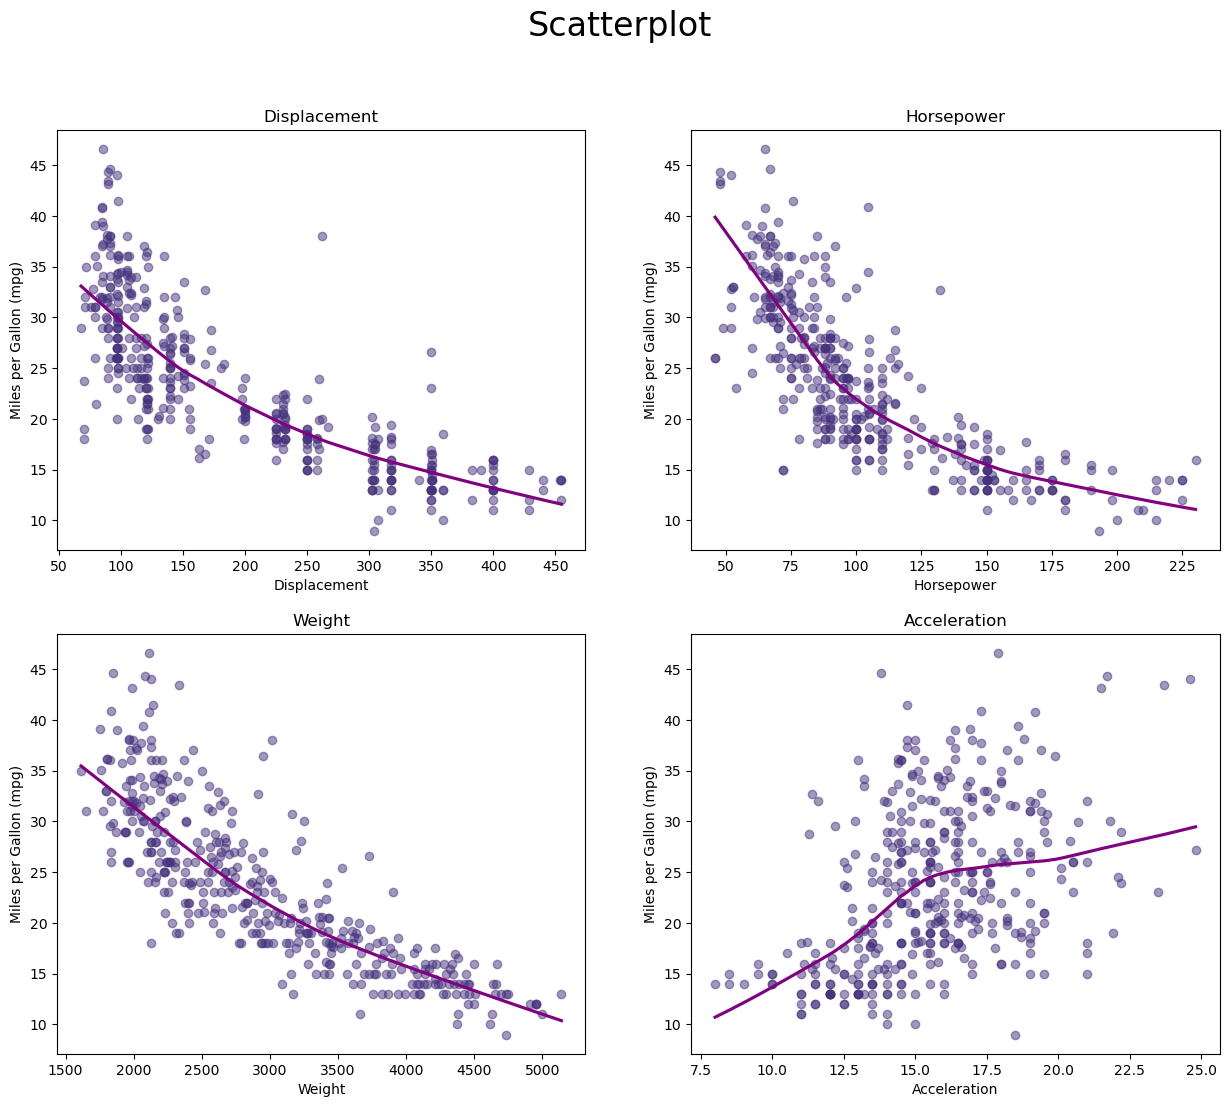

In [373]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# First subplot
sns.regplot(x='displacement', y='mpg', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'purple'},  lowess=True, ax=axes[0, 0])
axes[0, 0].set_title("Displacement")
axes[0, 0].set_xlabel("Displacement")
axes[0, 0].set_ylabel("Miles per Gallon (mpg)")

# Second subplot
sns.regplot(x='horsepower', y='mpg', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'purple'},  lowess=True, ax=axes[0, 1])
axes[0, 1].set_title("Horsepower")
axes[0, 1].set_xlabel("Horsepower")
axes[0, 1].set_ylabel("Miles per Gallon (mpg)")

# Third subplot
sns.regplot(x='weight', y='mpg', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'purple'}, lowess=True, ax=axes[1, 0])
axes[1, 0].set_title("Weight")
axes[1, 0].set_xlabel("Weight")
axes[1, 0].set_ylabel("Miles per Gallon (mpg)")

# Fourth subplot
sns.regplot(x='acceleration', y='mpg', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'purple'}, lowess=True, ax=axes[1, 1])
axes[1, 1].set_title("Acceleration")
axes[1, 1].set_xlabel("Acceleration")
axes[1, 1].set_ylabel("Miles per Gallon (mpg)")

# Add title
fig.suptitle("Scatterplot", fontsize=24)

When looking at the impact of weight on vehicle performance, we can see a negative linear relationship between the two variables. 

### Lineplot

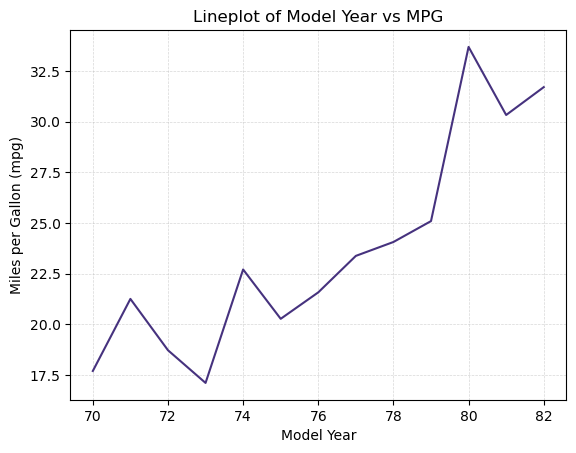

In [374]:
# New variable
avg_mpg = df.groupby('model year')['mpg'].mean().reset_index()

# Seaborn plot
sns.lineplot(x='model year', y='mpg', data=avg_mpg)

# Labels
plt.title("Lineplot of Model Year vs MPG")
plt.xlabel("Model Year")
plt.ylabel("Miles per Gallon (mpg)")

# Grid
plt.grid(linestyle="--", linewidth=0.5, alpha=0.5)

This lineplot demonstrates the trend of mpg performance across vehicles between 1970 and 1982.  From the data, we can see that is the early 1970s, there were fluctuations in the average miles per gallon performance across vehicles but there was no clear trend during this period. However, after 1975, there was a steady increase in the average mpg performance and then a significant jump between 1979 and 1980. 

This increase in mpg performance is largely expected with the US Congress passing fuel efficiency standards in 1975, as a repsonse to the Oil Price crisis in the early 1970s. These standards were aimed at doubling passenger vehicle efficiency to 27.5 mpg within 10 years.

### KDE plots

A Kernel Density Estimate plot is a continuous curve that represents the distribution of values across the curve.

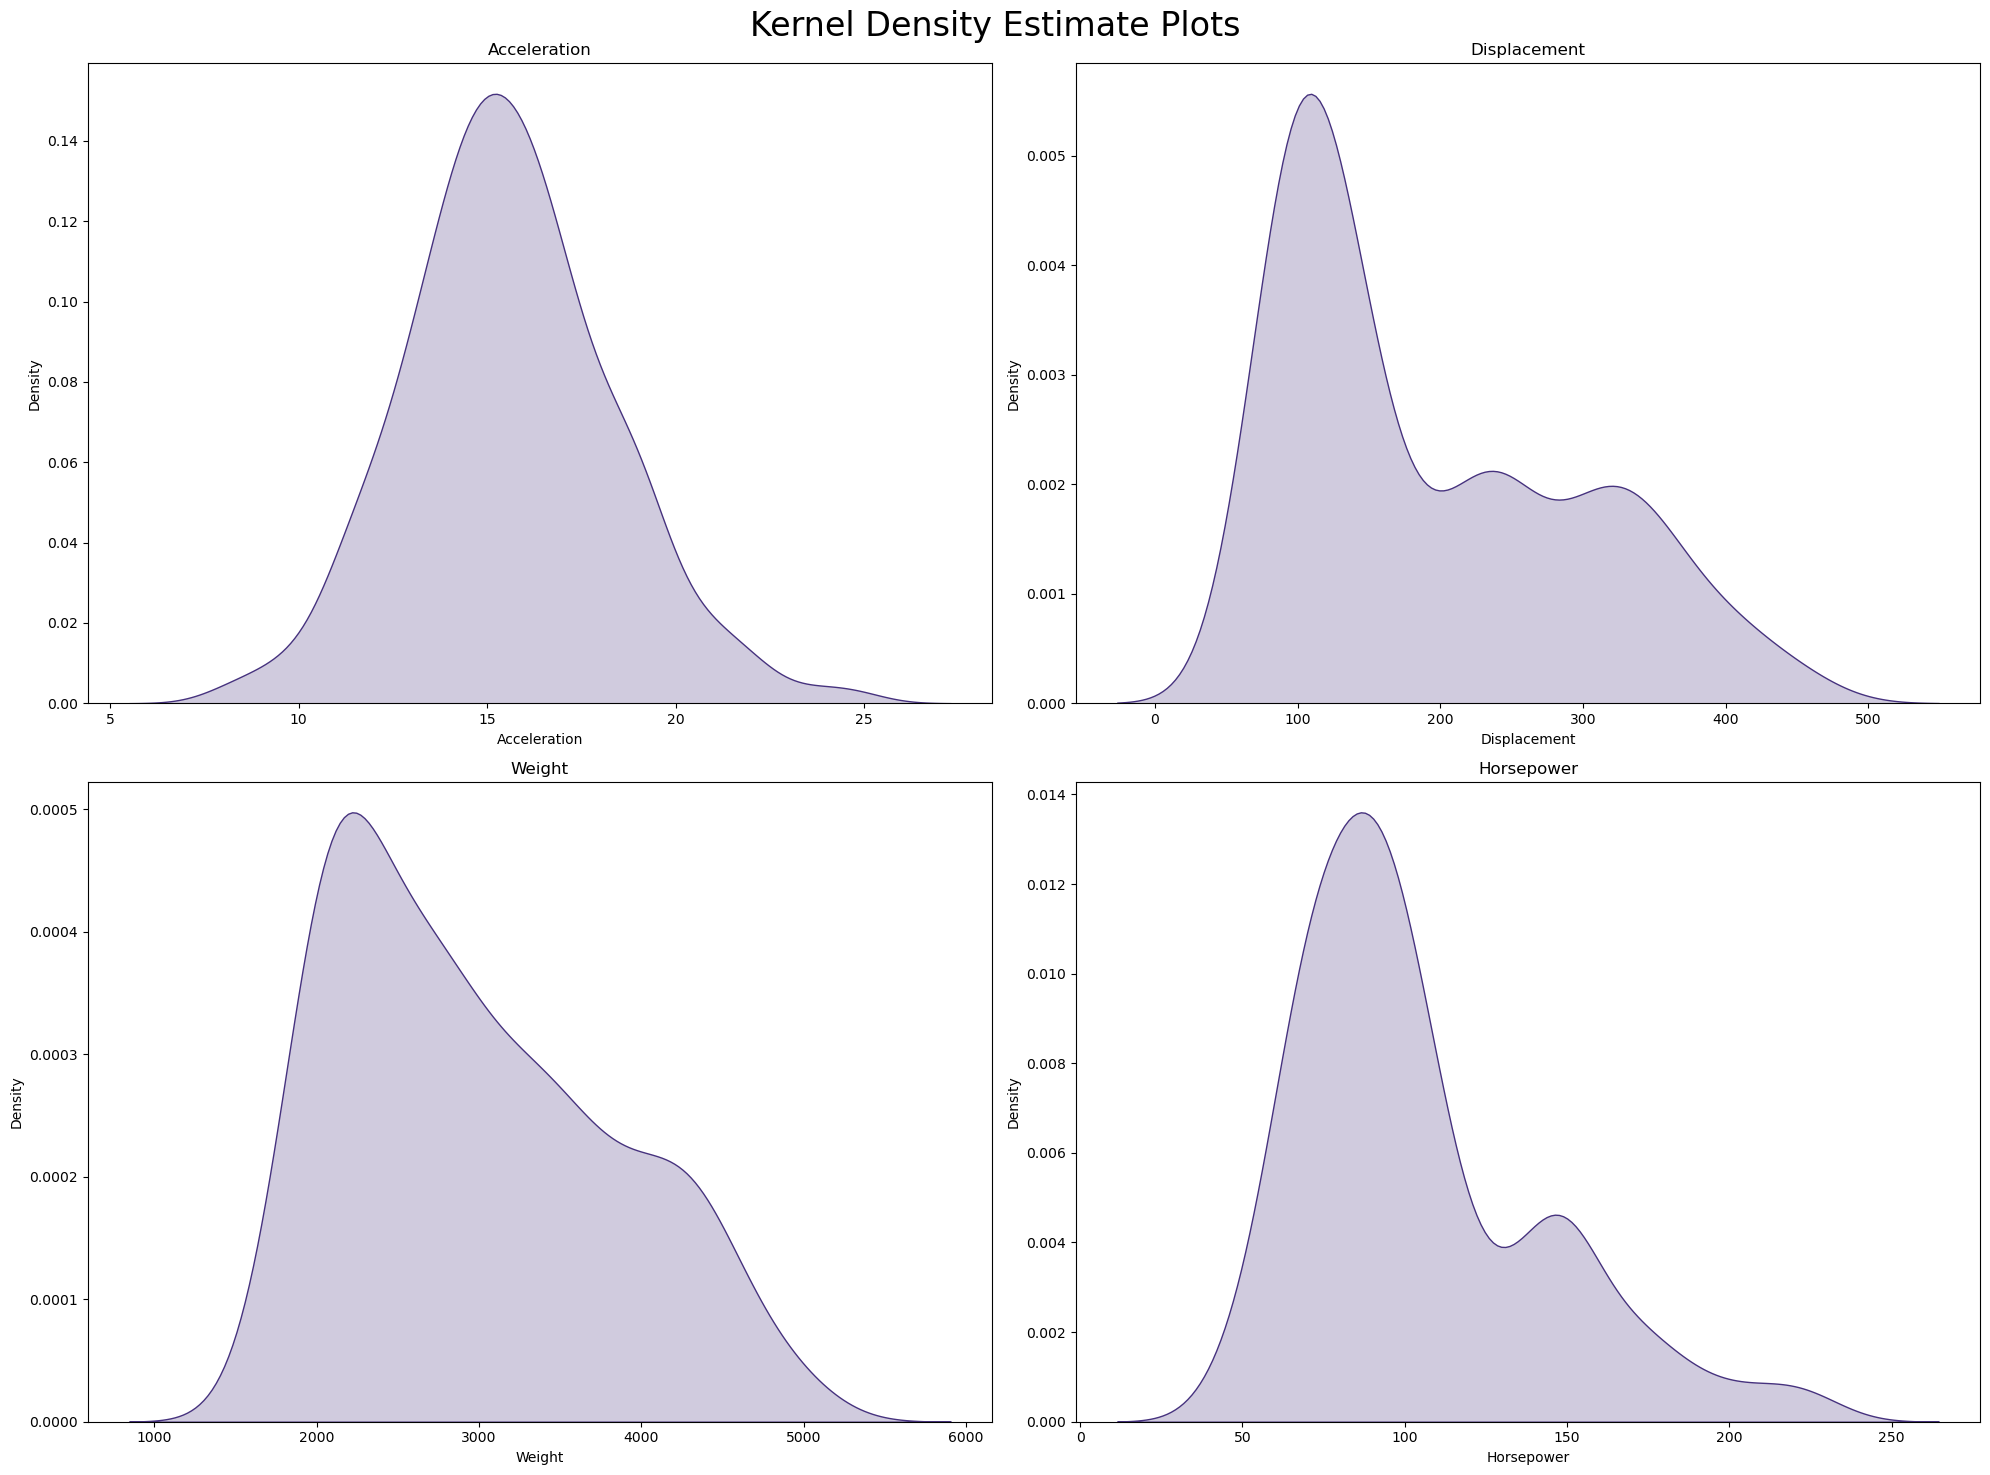

In [375]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

# First subplot
sns.kdeplot(x='acceleration', data=df, fill=True, ax=axes[0, 0])
axes[0, 0].set_title("Acceleration")
axes[0, 0].set_xlabel("Acceleration")

# Second subplot
sns.kdeplot(x='displacement', data=df, fill=True, ax=axes[0, 1])
axes[0, 1].set_title("Displacement")
axes[0, 1].set_xlabel("Displacement")

# Third subplot
sns.kdeplot(x='weight', data=df, fill=True, ax=axes[1, 0])
axes[1, 0].set_title("Weight")
axes[1, 0].set_xlabel("Weight")

# Fourth subplot
sns.kdeplot(x="horsepower", data=df, fill=True, ax=axes[1, 1])
axes[1, 1].set_title("Horsepower")
axes[1, 1].set_xlabel("Horsepower")

# Set a title for the entire subplot grid
fig.suptitle("Kernel Density Estimate Plots", fontsize=24)

# Set spacing
plt.tight_layout()

# Display
plt.show()

When looking at the KDE plots for our numerical variables, the acceleration variable is the only variable that approximates a normal distribution. For all the other variables the data is skewed to the right with a long tail. 

To address this, we can try to transform the variables using log transformations.

### Boxplots

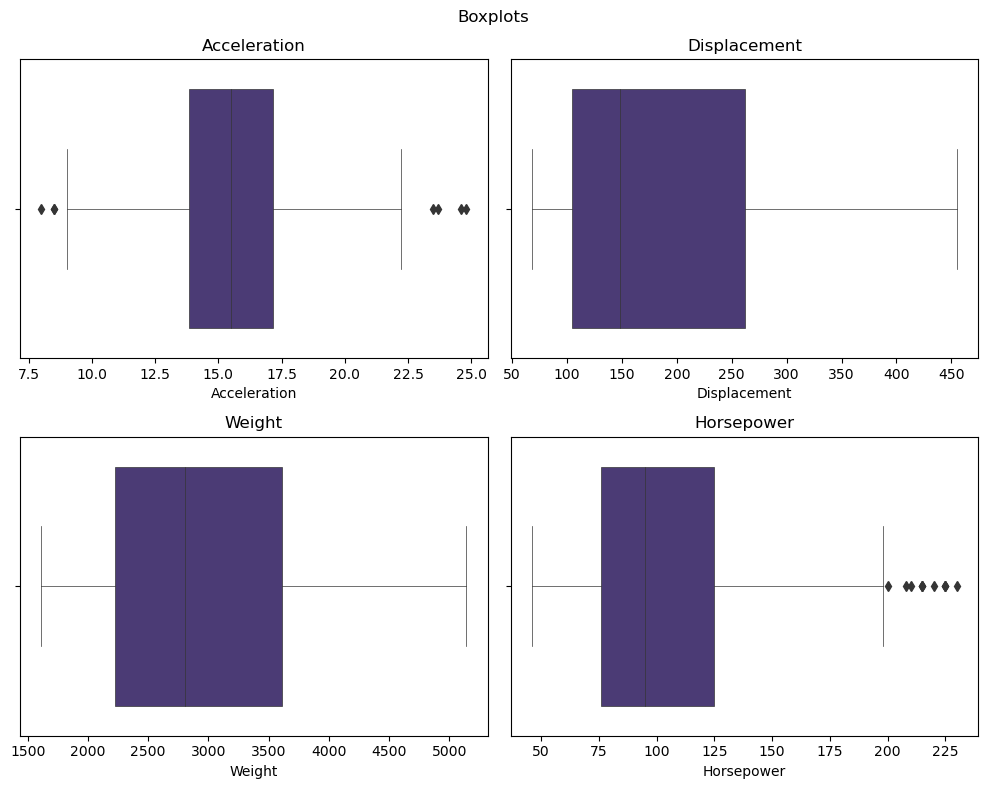

In [376]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# First subplot
sns.boxplot(x='acceleration', data=df, ax=axes[0, 0], linewidth=0.5)
axes[0, 0].set_title("Acceleration")
axes[0, 0].set_xlabel("Acceleration")

# Second subplot
sns.boxplot(x='displacement', data=df, ax=axes[0, 1], linewidth=0.5)
axes[0, 1].set_title("Displacement")
axes[0, 1].set_xlabel("Displacement")

# Third subplot
sns.boxplot(x='weight', data=df, ax=axes[1, 0], linewidth=0.5)
axes[1, 0].set_title("Weight")
axes[1, 0].set_xlabel("Weight")

# Fourth subplot
sns.boxplot(x="horsepower", data=df, ax=axes[1, 1], linewidth=0.5)
axes[1, 1].set_title("Horsepower")
axes[1, 1].set_xlabel("Horsepower")

# Add title
plt.suptitle("Boxplots")

# Set spacing
plt.tight_layout()

# Display
plt.show()

These boxplots confirm our findings that the displacement, weight and horsepower variables are skewed to the right, highlighted by the long tails to the right of the distribution. However, they also highlight the outliers present in both the horsepower and acceleration variables. 

I plan to transform the horsepower variable to reduce the impact of the outliers. For the acceleration variable, there are outliers present, for which we can take the following actions:
* Drop the rows entirely to improve accuracy
* Log transform the variable

### Statistical tests for correlation

### Heatmap 

C:\Users\pjhop\AppData\Local\Temp\ipykernel_29520\2406092568.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

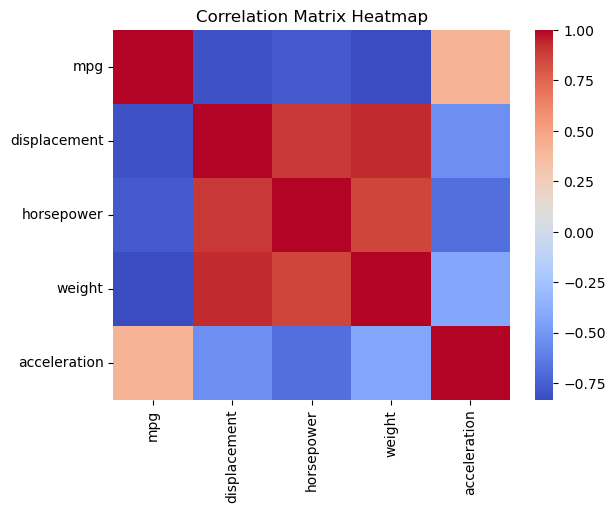

In [377]:
# Correlation matrix
corr_matrix = df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, cmap="coolwarm")

# Title
plt.title("Correlation Matrix Heatmap")

We can see from the heatmap that there are a large number of a variables which are highly correlated and this could present issues with multicollinearity. This would mean using all these variables for regression analysis would violate the assumptions underlying the model.

Some possible ways to resolve this would be:
* Dropping highly correlated variables
* Transformation of the variables
* Regularization techniques - LASSO, Ridge or Elastic Net regression methods

## Preparation of the training and test datasets

In [378]:
x = final_df.drop(["mpg"], axis=1)
y = final_df["mpg"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=121)

In [379]:
scaler = StandardScaler()

In [380]:
numeric_columns = ['displacement', 'horsepower', 'weight', 'acceleration']
X_train_numeric = X_train[numeric_columns]
X_test_numeric = X_test[numeric_columns]

In [381]:
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

In [382]:
X_train[numeric_columns] = X_train_scaled
X_test[numeric_columns] = X_test_scaled

# Prediction

When looking at the mpg performance of vehicles, we will consider a wide range of different regression models. Initially, we will start with a linear regression and then expand to regularized regression methods to see if they improve the performance and can overcome any problems with multicollinearity.

After this, we will look at decision trees and random forest methods, 

less used, knn and svr.

Finally, we then consider gradient boosting and neural networks.

## Linear regression

### Model fit

In [383]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Prediction and evaluation

In [384]:
y_pred = lr.predict(X_test)

In [385]:
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [386]:
print("R-squared score: ", round(r_squared, 3))
print("Mean squared error: ", round(mse, 3))

R-squared score:  0.87
Mean squared error:  8.127


## Regularized regression methods

### Lasso regression

In [387]:
lasso = Lasso(alpha=1.0)

In [388]:
lasso.fit(X_train, y_train)

Lasso()

In [389]:
lasso_y_pred = lasso.predict(X_test)

In [390]:
lasso_r_squared = r2_score(y_test, lasso_y_pred)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)

In [391]:
print("R-squared score: ", round(lasso_r_squared, 3))
print("Mean squared error: ", round(lasso_mse, 3))

R-squared score:  0.662
Mean squared error:  21.143


### Ridge regression

In [392]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [393]:
ridge_y_pred = ridge.predict(X_test)

In [394]:
ridge_r_squared = r2_score(y_test, ridge_y_pred)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)

In [395]:
print("R-squared score: ", round(ridge_r_squared, 3))
print("Mean squared error: ", round(ridge_mse, 3))

R-squared score:  0.861
Mean squared error:  8.668


### Elastic net regression

In [396]:
en = ElasticNet()
en.fit(X_train, y_train)

ElasticNet()

In [397]:
en_y_pred = en.predict(X_test)

In [398]:
elastic_net_r_squared = r2_score(y_test, en_y_pred)
elastic_net_mse = mean_squared_error(y_test, en_y_pred)

In [399]:
print("R-squared score: ", round(elastic_net_r_squared, 3))
print("Mean squared error: ", round(elastic_net_mse, 3))

R-squared score:  0.628
Mean squared error:  23.28


### Evaluation

When looking at the regularized regression methods, it appears that despite the likely multicollinearity in the dataset, neither lasso or ridge regression techniques outperform the linear regression model. Whilst, the direct comparison between the two models confirms that the ridge regression vastly outperforms the lasso regression. This is likely due to the ridge regresssion not being able to shrink coefficients to zero and all variables contributing to mpg performance.

## K-Nearest Neighbors regression

In [400]:
knn_reg = KNeighborsRegressor()

param_grid3 = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],       # The number of neighbors to consider.
    'weights': ['uniform', 'distance']     # Weighting of points towards the overall regression
}

# Scoring parameters
scoring = {
    "r2": make_scorer(r2_score),
    "mse": make_scorer(mean_squared_error)
}

grid_search_knn = GridSearchCV(knn_reg, param_grid3, cv=5, scoring=scoring, refit="r2")

In [401]:
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'weights': ['uniform', 'distance']},
             refit='r2',
             scoring={'mse': make_scorer(mean_squared_error),
                      'r2': make_scorer(r2_score)})

In [402]:
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

In [403]:
print(f"Best parameters: {best_params_knn}")
print(f"R-squared: {best_score_knn}")

Best parameters: {'n_neighbors': 5, 'weights': 'distance'}
R-squared: 0.8359574471432831


### Radius variation

We will also consider another type of neighbors regression methods, called the radius neighbors regression. The key difference between the two methods, the radius based method considers all datapoints within a certain radius rather than a predetermined number of the closest points.

In [404]:
rnr = RadiusNeighborsRegressor()

param_grid4 = {
    'radius': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
    'weights': ['uniform', 'distance']
}

grid_search_rnr = GridSearchCV(rnr, param_grid4, cv=5, scoring=scoring, refit="r2")

In [405]:
grid_search_rnr.fit(X_train, y_train)

C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 911, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\Users\pjhop\anaconda3\lib\site

C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 911, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\Users\pjhop\anaconda3\lib\site

C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 911, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\Users\pjhop\anaconda3\lib\site

C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 911, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\Users\pjhop\anaconda3\lib\site

C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 911, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\Users\pjhop\anaconda3\lib\site

C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 911, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\Users\pjhop\anaconda3\lib\site

C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\neighbors\_regression.py:494: UserWarning: One or more samples have no neighbors within specified radius; predicting NaN.
  warnings.warn(empty_warning_msg)
C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\metrics\_regression.py", line 911, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "C:\Users\pjhop\anaconda3\lib\site

C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan 0.67371001 0.70811065 0.63403238 0.68220844
 0.55000709 0.63237501 0.46686405 0.58838327 0.35654338 0.5363683
 0.23848422 0.48253403]
  warnings.warn(
C:\Users\pjhop\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan         nan         nan         nan
         nan         nan 19.4675411  17.42597064 21.72854202 18.90506623
 26.73424493 21.88539224 31.76872442 24.56680419 38.32860974 27.68323913
 45.34246434 30.90226174]
  warnings.warn(


GridSearchCV(cv=5, estimator=RadiusNeighborsRegressor(),
             param_grid={'radius': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5,
                                    5.0],
                         'weights': ['uniform', 'distance']},
             refit='r2',
             scoring={'mse': make_scorer(mean_squared_error),
                      'r2': make_scorer(r2_score)})

In [406]:
best_params_rnr = grid_search_rnr.best_params_
best_score_rnr = grid_search_rnr.best_score_
print(f"Best parameters: {best_params_rnr}")
print(f"Negative mean squared error: {best_score_rnr}")

Best parameters: {'radius': 2.5, 'weights': 'distance'}
Negative mean squared error: 0.7081106512967742


When looking at the radius based neighbors model, we can see that in our cross-validation parameter search there are instances where there are no other datapoints that are in the radius. Whilst this model does not perform well, it does a highlight an alternative variation of the kNN regression. 

## Decision Tree

In [407]:
tree = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(tree, param_grid, cv=5, scoring=scoring, refit="r2")

In [408]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             refit='r2',
             scoring={'mse': make_scorer(mean_squared_error),
                      'r2': make_scorer(r2_score)})

In [409]:
# Get the best hyperparameters and retrain the model
best_tree = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [410]:
print(f"Best parameters: {best_params}")
print(f"R-squared: {best_score}")

Best parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
R-squared: 0.7469281796900527


## Random Forest

In [411]:
rf = RandomForestRegressor()

param_grid1 = {
    'n_estimators': [20, 40, 60, 80, 100],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search1 = GridSearchCV(rf, param_grid1, cv=5, scoring=scoring, refit="r2")
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 40, 60, 80, 100]},
             refit='r2',
             scoring={'mse': make_scorer(mean_squared_error),
                      'r2': make_scorer(r2_score)})

In [412]:
# Get the best hyperparameters and retrain the model
best_params_1 = grid_search1.best_params_
best_score_1 = grid_search1.best_score_

In [413]:
print(f"Best parameters: {best_params_1}")
print(f"Mean squared error: {best_score_1}")

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean squared error: 0.8170710675558688


## Gradient boosting

In [346]:
grb = GradientBoostingRegressor()
param_grid2 = {
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'n_estimators': [20, 40, 60, 80, 100], 
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

GridSearch2 = GridSearchCV(grb, param_grid2, cv=5, scoring=scoring, refit="r2")
GridSearch2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 40, 60, 80, 100],
                         'subsample': [0.8, 0.9, 1.0]},
             refit='r2',
             scoring={'mse': make_scorer(mean_squared_error),
                      'r2': make_scorer(r2_score)})

In [347]:
best_param_2 = GridSearch2.best_params_
best_score_2 = GridSearch2.best_score_

In [348]:
print(f"Best parameters: {best_param_2}")
print(f"Mean squared error: {best_score_2}")

Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 40, 'subsample': 0.8}
Mean squared error: 0.8554745292487282


## Neural network

In [438]:
# Create the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model on the test dataset
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

Epoch 1/100
10/10 [==============================] - 1s 1ms/step - loss: 592.4425
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 545.6054
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 469.0039
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 333.2410
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 148.6703
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 47.7558
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 40.0666
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 25.5126
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 21.5695
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 16.7525
Epoch 11/100
10/10 [==============================] - 0s 1ms/step - loss: 14.3715
Epoch 12/100
10/10 [==============================] - 0s 1ms/step - loss: 12.3390
Epoch 13/100
10/10 [

In [439]:
# Evaluate the model on the test dataset
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-squared (Coefficient of Determination):', r2)

4/4 [==============================] - 0s 1ms/step
R-squared (Coefficient of Determination): 0.8761661219031285
